In [16]:
import json
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt

In [1]:

f = open("reviews_Apps_for_Android_5.json")
line = f.readline()

# Field in json for each review
print j.keys()
#[u'reviewerID', u'asin', u'reviewerName', u'helpful', u'reviewText', u'overall', u'summary', u'unixReviewTime', u'reviewTime']

# Get a count of review for each customer
c = Counter()
c[ j["reviewerID"] ] += 1
for line in f:
    j = json.loads(line)
    c[ j["reviewerID"] ] += 1

f.close()

# Number of unique customer
print len(c)
# 87271

print c.most_common(10)
# [(u'A1X1CEGHTHMBL1', 565), (u'ACX8G3IW95BNE', 513), (u'A2C05OHYJERICI', 469), (u'A3F3B6HY9RJI04', 467), (u'A1VM5Y6BL07X9X', 338), (u'A1E1LEVQ9VQNK', 327), (u'ASXYFYCPIP232', 322), (u'A2YAUX8C73PN43', 288), (u'AVVK3WYO1TRZO', 259), (u'A17KRI7HC6NF69', 254)]

# Check how much ID have more than X reviews
print sum( 1 for key, value in c.items() if value > 100 )
# 54
print sum( 1 for key, value in c.items() if value > 20 )
# 3464
print sum( 1 for key, value in c.items() if value > 10 )
# 16199

ID_10plus = [ key for key, value in c.items() if value > 10 ]

{"reviewerID": "A1N4O8VOJZTDVB", "asin": "B004A9SDD8", "reviewerName": "Annette Yancey", "helpful": [1, 1], "reviewText": "Loves the song, so he really couldn't wait to play this. A little less interesting for him so he doesn't play long, but he is almost 3 and likes to play the older games, but really cute for a younger child.", "overall": 3.0, "summary": "Really cute", "unixReviewTime": 1383350400, "reviewTime": "11 2, 2013"}

{u'reviewerID': u'A1N4O8VOJZTDVB', u'asin': u'B004A9SDD8', u'reviewerName': u'Annette Yancey', u'helpful': [1, 1], u'reviewText': u"Loves the song, so he really couldn't wait to play this. A little less interesting for him so he doesn't play long, but he is almost 3 and likes to play the older games, but really cute for a younger child.", u'overall': 3.0, u'summary': u'Really cute', u'unixReviewTime': 1383350400, u'reviewTime': u'11 2, 2013'}
[u'reviewerID', u'asin', u'reviewerName', u'helpful', u'reviewText', u'overall', u'summary', u'unixReviewTime', u'review

In [7]:
# Get infos for customer with names
set_ID = { key for key, value in c.items() if value > 10 }
f = open("reviews_Apps_for_Android_5.json")

d = {}
for i, line in enumerate(f):
    j = json.loads(line)
    try:
        if j["reviewerID"] in set_ID:
            d[ j["reviewerID"] ] = j["reviewerName"]
    except:
        pass
f.close()

In [8]:
print len(d)

16199


In [9]:
d.items()[:20]

[(u'A3FSPSSTLOD4VU', u'Kindle Fire Reader'),
 (u'A1LTYRWPRBZ1QV', u'D. K. Dutton'),
 (u'A1XQ02SMSD2ZAZ', u'Shorty62'),
 (u'A32D7J4UVMB3Q3', u'E. Chapin'),
 (u'A2BC3CF07FS4FH', u'ginger'),
 (u'A31XRDIK9603Y0', u'Ross Lynch'),
 (u'ARVW5GNMO9QU7', u'Shari Riley'),
 (u'A3AML3Z5YGEXLO', u'pianoman'),
 (u'A2K5JJR48R9ZJ8', u'The Guy "ahh"'),
 (u'A20G2VM22QGXBI', u'ravin'),
 (u'A1JOPT5UUZ806E', u'MDR'),
 (u'A3GO5NEFEII582', u'Hardcoreicemoth'),
 (u'A38Z6J0VGZ1WOY', u'Jacee'),
 (u'A1DKHL1V96FQTZ', u'James Laabs "James Laabs"'),
 (u'A2HH19CTU47T8M', u'x man'),
 (u'AQI8LK0SX0UR8', u'Evelyn Bays'),
 (u'A3UQ8OZXR1T6VH', u'Nancy Drew &#34;Helen&#34;'),
 (u'A2VV9X8R1ERE1H', u'Amazon Customer'),
 (u'A2Y8YFXEZWW34Y', u'Gluten-free Mom'),
 (u'A3F247QGJME3LH', u'Skinny Reader "newju52"')]

In [17]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

nb_sample = len(d)

X, y = make_blobs(n_samples=nb_sample, n_features=10, centers=3, random_state=42)

min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

In [18]:
X_minmax

array([[ 0.08062397,  0.82813292,  0.7530661 , ...,  0.26125468,
         0.31622426,  0.37653152],
       [ 0.16717769,  0.92589166,  0.86192146, ...,  0.24282812,
         0.58036913,  0.43702028],
       [ 0.47274509,  0.91443871,  0.69223816, ...,  0.96529779,
         0.63252173,  0.851589  ],
       ..., 
       [ 0.81677145,  0.18222749,  0.13849421, ...,  0.34190685,
         0.66848823,  0.1181999 ],
       [ 0.85695624,  0.22578063,  0.19034063, ...,  0.11310294,
         0.7882461 ,  0.13159479],
       [ 0.7664683 ,  0.1527945 ,  0.20904611, ...,  0.20371794,
         0.78053678,  0.22616536]])

In [20]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
X_tsne = model.fit_transform(X_minmax) 

In [22]:
X_tsne

array([[-11.78086831,  15.97858541],
       [ -5.10271245,  17.36703025],
       [ 11.0042495 ,  -4.68444959],
       ..., 
       [ -0.96333975,  -9.82837452],
       [ -5.82337063,  -6.09561874],
       [-13.35137498,  -8.64488728]])

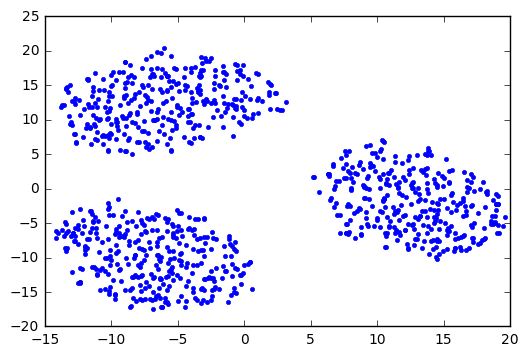

In [23]:
plt.plot(X_tsne[:,0], X_tsne[:,1], '.')

In [24]:
#most popular product:

f = open("reviews_Apps_for_Android_5.json")
line = f.readline()

p = Counter()
for line in f:
    j = json.loads(line)
    p[ j["asin"] ] += 1

f.close()

In [25]:
p.most_common(10)

[(u'B00FAPF5U0', 6282),
 (u'B0086700CM', 4637),
 (u'B00992CF6W', 4018),
 (u'B009UX2YAC', 3814),
 (u'B0064X7B4A', 3763),
 (u'B00DJFIMW6', 3668),
 (u'B0054JZC6E', 3458),
 (u'B0063IH60K', 3440),
 (u'B005ZXWMUS', 3221),
 (u'B009HKL4B8', 3124)]